# Sellmeier
Calculate index of refraction or poling period for various nonlinear optical materials

In [1]:
from sellmeier import *
import numpy as np
import matplotlib.pyplot as plt

## Index of refraction

Find the index of refraction for λ=1064nm in KTP for  y-axis and z-axis polarizations. Room temperature is assumed by default.

In [2]:
index(1064,'ktpy'),index(1064,'ktpz')

(1.7454680019979687, 1.82966897165963)

Index of KTP waveguide at 1550nm at 60°C. Polarization along z-axis if material is anisotropic.

In [3]:
index(1550,'ktpwg',60) # z-axis by default

1.8206493041702032

For index corresponding to other axes, append the axis.

In [4]:
index(532,'lnx'),index(532,'lny'),index(532,'lnz')

(2.3231916549460148, 2.3231916549460148, 2.233567663820966)

Current list of available Sellmeier equations:

In [5]:
print(' '.join(sellmeierlist))

lnwg lnwgz mglnwg mglnwgz mglnridgewg mglnridgewgz mglnhalfridgewg mglnhalfridgewgz lnridgewg lnridgewgz lnhalfridgewg lnhalfridgewgz mglnridgewgy mglnhalfridgewgy lnridgewgy lnhalfridgewgy gaymglnwg ktpwg ktpwgz ktpwgy ktpwgx eman emanz emanx emany ktp ktpz kat katz ktpx katx ktpy katy fan fanz fanx fany frad fradz van vanz vanx vany criktp crirtp chex chey che chez rtpx rtpy rtp rtpz rtax rtay rta rtaz ktax ktay kta ktaz ctax ctay cta ctaz dmirtp fenrta fevrta fevkta crikta slt mgslt clt abeltx abelty abeltz ln lnz cln clnz lnx lny clnx clny gaymgln gaymglnz gaymglnx gaymglny mgln mglnz mglne zelmgln zelmglnz lenmgln mglnx mglny mglno zelmglnx zelmglny yam lnrouwg lnsurfx lnsurfz lnjun sio2 sio2cvi sio2schott quartz quartze quartzz quartzo quartzy bk7 bk7cvi noa yvo4 yvo4e yvo4z yvo4o yvo4y ndyvo4 ndyvo4e ndyvo4z ndyvo4o ndyvo4y


## Poling period

Poling period (in µm) 1310 + 1550 SFG for the type 0 or **zzz** interaction in bulk KTP waveguide at 100°C operation. Note that **Type** is capitalized since lowercase **type** is a python keyword.

In [6]:
polingperiod(1310,1550,'ktp',Type='zzz',temp=100)

20.248337166594684

Poling period for type II 810y + 1550z SFG in bulk KTP waveguide at 100°C operation. Note that λy always comes first! The interaction **Type** is specified as a three letter string corresponding to the polarization axis of each wavelength in order of signal, idler, pump 

In [7]:
polingperiod(810,1550,'ktp',Type='yzy',temp=100)

42.44102077636052

Poling period for type I 976nm SHG in bulk MgLN. Note that if the second wavelength is omitted SHG is assumed by default.

In [8]:
polingperiod(976,sell='mgln',Type='yyz',temp=100)

33.68602542525995

Poling period (in µm) for 1064nm SHG in KTP waveguide with 1240nm SHG nonpoled at 40°C operation. Type **zzz** is assumed by default.

In [9]:
polingperiod(1064,1064,'ktpwg',temp=40,npy=1240,npz=1240)

7.969747049021353

Poling period for 1550nm SHG in LN (RPE) waveguide at 60°C operation

In [10]:
polingperiod(1550,1550,'lnwg',temp=60) # Type 0 (zzz) by default

15.855919438850812

Poling period for Type II 810y+1550z→532y SFG in MgLN ridge waveguide at 40°C (10µm × 10µm ridge diced to full depth)

In [11]:
polingperiod(810,1550,'mglnridgewg',temp=40,Type='yzy') # λy always comes first

4.792446286661043

Poling period for Type I 1560y+1560y→780z SHG in MgLN half ridge at 40°C (10µm × 10µm ridge diced to 5µm depth)

In [12]:
polingperiod(1560,1560,'mglnhalfridgewg',temp=40,Type='yyz')

-21.507706177391082

Poling period for backward QPM SFG of forward 1540nm and backward 1580nm SHG in bulk MgLN for the **yyy** interaction

In [13]:
polingperiod(1540,-1580,'mgln',Type='yyy')

0.35046604398924597

## Find a value given the poling period

Often we will know the poling period and want to find the value of another parameter that will give that poling period. This can be done using the same **polingperiod** function by supplying an argument **Λ** for the period in µm, and supplying **None** for the value of the parameter we want to find.

Find the SHG wavelength for a KTP waveguide with a given poling period

In [14]:
polingperiod(None,None,'ktpwg',Λ=8)

1064.1366900348546

Same thing but with knowledge of the nonpoled wavelengths

In [15]:
polingperiod(None,None,'ktpwg',Λ=8,npy=1260,npz=980)

1060.0723164065398

Find the SFG wavelength given 30µm poling period and 40°C temperature

In [16]:
polingperiod(1550,None,'ktp',Λ=-30,Type='yzy',temp=40)

multiple values found for poling period Λ=-30µm


809.2186002364344

Find the SHG temperature given the poling period (in °C)

In [17]:
polingperiod(1550,810,'ktp',Λ=-30,Type='yzy',temp=None)

43.97212470823115

A KTP waveguide with 8µm period was measured with 1064nm → 532nm SHG at a tempearture of 60°C. What is the best guess for its nonpoled SHG (in nm)?

In [18]:
polingperiod(1064,1064,'ktpwg',Type='zzz',temp=60,npy=None,npz=None,Λ=8)

1225.141729065055

## Poling period bandwidth

List all FWHM bandwidths for a given interaction. Default is for an interaction length of 10mm. Units are in nm except for **temp** which is in °C. The poling period (in µm) is also returned.

In [19]:
polingperiodbandwidths(1064,1064,'ktpwg',Type='yzy')

{'sfg1': 0.7190376611561362,
 'sfg2': 2.076063992868806,
 'shg': 0.53406511216607,
 'dc1': 1.1000326285399757,
 'dc2': 1.1000336563710318,
 'dfg1': 0.5190149485940085,
 'dfg2': 0.1797593882092563,
 'temp': 17.407056396099257,
 'period': 53.56330670757766}

Find the wavelength tuning bandwidths for the type II 810y+1550z SFG interaction in a 20mm KTP waveguide, first for fixed 1550nm wavelength, next for fixed 810nm 

In [20]:
print(polingperiodbandwidths(810,1550,'ktpwg',Type='yzy',kind='sfg1'))
print(polingperiodbandwidths(810,1550,'ktpwg',Type='yzy',kind='sfg2'))

0.5226854712110836
2.8856149152842097


Let's assume we have a 15mm ridge waveguide poled for the type II interaction 1550nm + 810nm ↔ 532nm. We produce DFG by inputing fixed 1550nm and tunable 532nm, and want to know the bandwidth when tuning the 532nm wavelength. (**dfg1** means the first wavelength is fixed.)

In [21]:
polingperiodbandwidths(810,1550,'mglnridgewg',Type='yzy',kind='dfg1',L=15)

0.041732751977435735

Downconversion bandwidths for type II 532y → 725y + 2000z in a 20mm KTP waveguide

In [22]:
print(polingperiodbandwidths(650,1574,'ktpwg',Type='yzy',kind='dc1'))
print(polingperiodbandwidths(650,1574,'ktpwg',Type='yzy',kind='dc2'))

7.957127369482789
46.247561099563214


Now let's find the wavelength tuning bandwidths for a type II backward QPM SHG interaction, first for the forward wavelength (λy), next for the backward (λz)

In [23]:
print(polingperiodbandwidths(810,-810,'ktpwg',Type='yzy',kind='sfg1'))
print(polingperiodbandwidths(810,-810,'ktpwg',Type='yzy',kind='sfg2'))

0.17061374321693543
0.014169130607308674


The frequency bandwidth can be found using the argument **getfreq**. The units are GHz.

In [24]:
polingperiodbandwidths(810,810,'mgln',Type='yyy',kind='shg',getfreq=True)

20.67630838357783

## Poling period bandwidth plots

Plot the 1064nm SHG bandwidth for a 5mm KTP waveguide with 1200nm SHG nonpoled

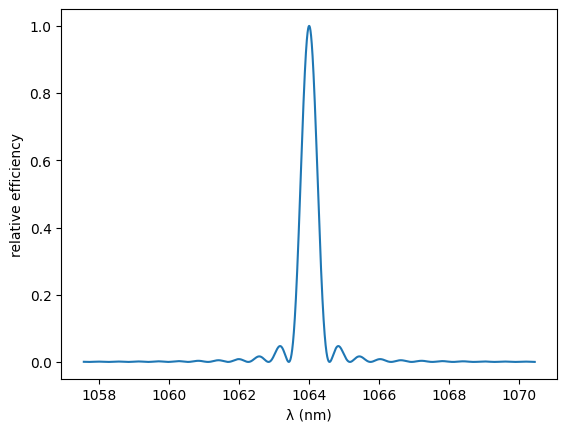

In [25]:
polingperiodbandwidths(1064,1064,'ktpwg',kind='shg',L=5,npy=1200,npz=1200,plot=True);

Same interaction but this time plot the temperature tuning bandwidth (FWHM in °C) centered at 50°C

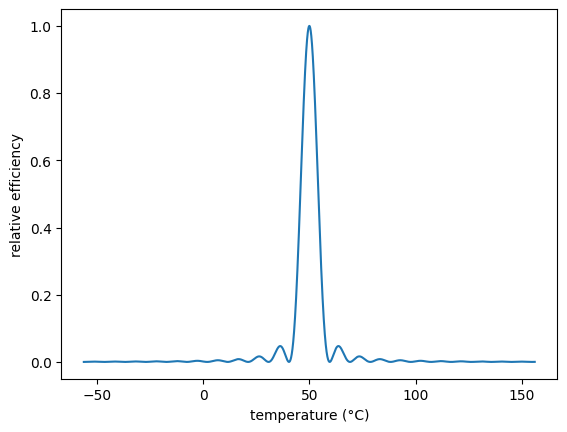

In [26]:
polingperiodbandwidths(1064,1064,'ktpwg',temp=50,kind='temp',L=5,npy=1200,npz=1200,plot=True);

## Phase matching plot

Plot the phasematching curve for the poling period for 1550 SHG in bulk MgLN. Note that in this case we observe that the poling period is phasematched for SHG of 1620nm as well, because it also has -20µm period, however the SHG corresponding to +20µm period is not plotted.

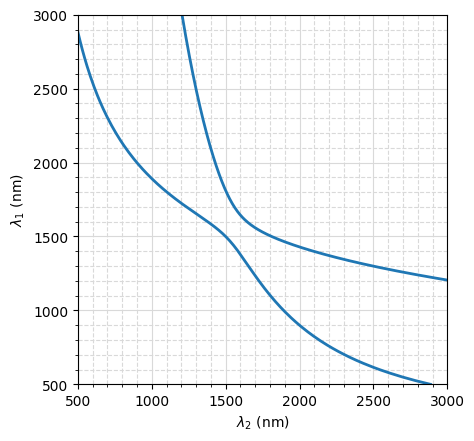

-20.02636079036358
-20.0226330250635


In [31]:
phasematchcurve(1500,1500,sell='mgln',Type='yyz',plot=True);
print(polingperiod(1500,1500,sell='mgln',Type='yyz'));
print(polingperiod(1620,1620,sell='mgln',Type='yyz'));


The phasematching curve can be plotted by giving the poling period instead of the wavelengths

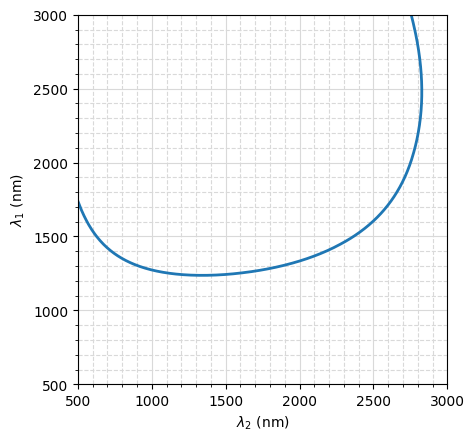

In [28]:
phasematchcurve(Λ=1e9,sell='ktpwg',Type='yzy',plot=True);

The function also returns the datapoints.

In [29]:
λ1,λ2 = phasematchcurve(1300,980,sell='ktpwg',Type='yzy');
print(λ1[:3]);
print(λ2[:3]);

[3000.0, 2995.0, 2990.0]
[2610.7103751284417, 2611.904576863314, 2613.0860848560083]
